## Prediction index of NASDAQ using RNN(LSTM)

We extract the dataset directly from the web yahoo finance selecting the value '^NDX'

LSTM, Long short term memory cells are used to predict the Close value

In [43]:
#pip install "jupyterlab-kite>=2.0.2"

In [44]:

# yfinance is a popular open source library to access the financial data available on Yahoo Finance
# https://pypi.org/project/yfinance/

import yfinance as yf

# typical library to plot and manipulate data

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from numpy import newaxis

# Normalize the data

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# keras to model and predict the data.

from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout
from keras.callbacks import ModelCheckpoint 

# Extraction

We extract the value '^NDX' for 6 years using the method Ticker from yfinance library. We can select other values: 
AMAZON(AMZN), Ibex(^IBEX), Google(GOOG),...

In [45]:
msft = yf.Ticker("^NDX")

df = msft.history(period="6y")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-05-12,4412.819824,4441.399902,4380.520020,4420.649902,1705870000,0,0
2015-05-13,4436.080078,4460.540039,4421.750000,4426.560059,1672260000,0,0
2015-05-14,4461.069824,4496.250000,4448.379883,4495.040039,1741970000,0,0
2015-05-15,4505.390137,4509.129883,4482.549805,4494.290039,1667260000,0,0
2015-05-18,4487.140137,4521.009766,4483.759766,4512.950195,1643870000,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1512 entries, 2015-05-12 to 2021-05-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1512 non-null   float64
 1   High          1512 non-null   float64
 2   Low           1512 non-null   float64
 3   Close         1512 non-null   float64
 4   Volume        1512 non-null   int64  
 5   Dividends     1512 non-null   int64  
 6   Stock Splits  1512 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 94.5 KB


In [47]:
# We select the 'Close' column

df_final = pd.DataFrame(df.iloc[:,3])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1512 entries, 2015-05-12 to 2021-05-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1512 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB


In [48]:
df_final.tail()

,Close
Date,
2021-05-06,13613.730469
2021-05-07,13719.629883
2021-05-10,13359.080078
2021-05-11,13351.269531
2021-05-12,13037.792969


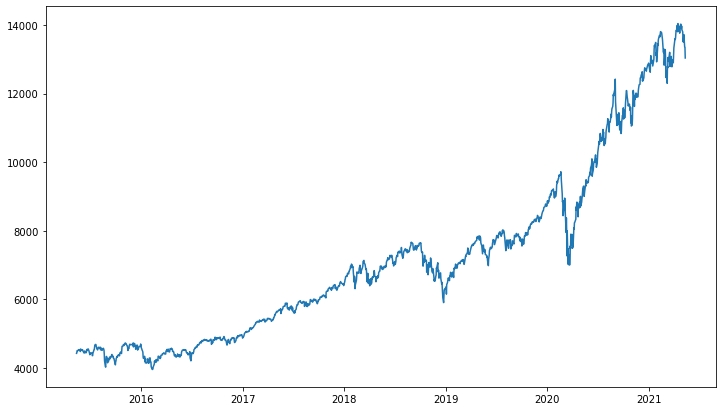

In [49]:
# we plot the time series at the begining to now

plt.figure(figsize=(12,7))

plt.plot(df_final['Close'])
plt.show()

# Scale the data


In [50]:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df_final)

scaled_data

array([[0.04684413],
       [0.04742964],
       [0.05421379],
       ...,
       [0.93235361],
       [0.93157984],
       [0.90052445]])

# Create the scaled training dataframe


In [51]:

tt = int(np.ceil(len(df_final)*0.95))

train_data = scaled_data[0:tt, :]

nn = 70

x_train = []
y_train = []

for i in range(nn, len(train_data)):
    x_train.append(train_data[i-nn:i, 0])
    y_train.append(train_data[i, 0])
    '''if i<= 61:
        print(x_train)
        print(y_train)
        print()'''
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1367, 70, 1)

# Build the LSTM model

In [52]:

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Activation('relu'))
model.add(LSTM(32, return_sequences=False))
model.add(Activation('relu'))
#model.add(Dense(15))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='RMSprop',
              loss='mse')

# parameters
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 70, 64)            16896     
_________________________________________________________________
activation_4 (Activation)    (None, 70, 64)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [53]:
checkpointer = ModelCheckpoint(filepath='stock_lstm.hdf5', 
                               verbose=1, save_best_only=True)

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=15,
                    epochs=30,
                    callbacks=[checkpointer],
                    verbose=1)

Epoch 1/30
92/92 [==============================] - 6s 36ms/step - loss: 0.0153
Epoch 2/30
92/92 [==============================] - 3s 33ms/step - loss: 0.0013
Epoch 3/30
92/92 [==============================] - 3s 34ms/step - loss: 0.0015
Epoch 4/30
92/92 [==============================] - 3s 33ms/step - loss: 9.7262e-04
Epoch 5/30
92/92 [==============================] - 3s 35ms/step - loss: 9.3673e-04
Epoch 6/30
92/92 [==============================] - 4s 45ms/step - loss: 7.1826e-04
Epoch 7/30
92/92 [==============================] - 5s 52ms/step - loss: 6.9167e-04
Epoch 8/30
92/92 [==============================] - 4s 46ms/step - loss: 6.9565e-04
Epoch 9/30
92/92 [==============================] - 3s 35ms/step - loss: 5.9902e-04
Epoch 10/30
92/92 [==============================] - 3s 35ms/step - loss: 5.3975e-04
Epoch 11/30
92/92 [==============================] - 3s 36ms/step - loss: 4.8722e-04
Epoch 12/30
92/92 [==============================] - 3s 35ms/step - loss: 5.7728e-04
E

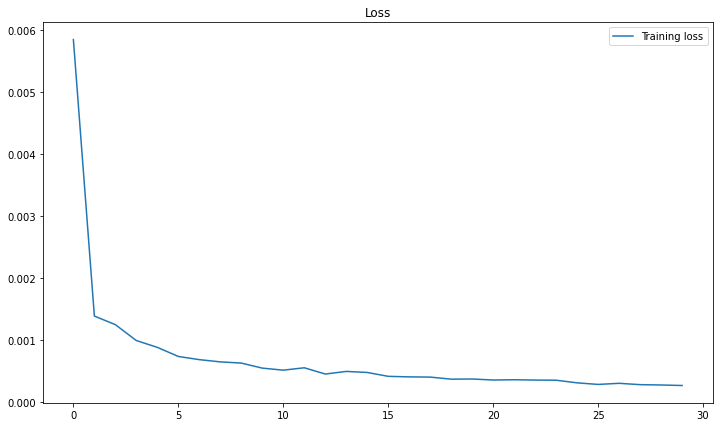

In [54]:
plt.figure(figsize=(12,7))
loss = history.history['loss']

plt.plot(range(len(loss)),loss, label='Training loss')
plt.title('Loss')
plt.legend()

plt.show();

# Create the scaled test dataframe

In [55]:

print(tt)
test_data = scaled_data[tt - nn: , :]
# Create the data sets x_test and y_test

print(len(test_data))
x_test = []
#print(len(df_final))
#print(df_final.head())
#y_test = df_final[tt:, :]
for i in range(nn, len(test_data)):
    x_test.append(test_data[i-nn:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

print(x_test.shape)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)
print('Len predictions: ',len(predict))

y_test = df_final.iloc[int(len(df_final)-len(predict)):, 0]
print('Len y_test: ',len(y_test))

1437
145
(75, 70)
Len predictions:  75
Len y_test:  75


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


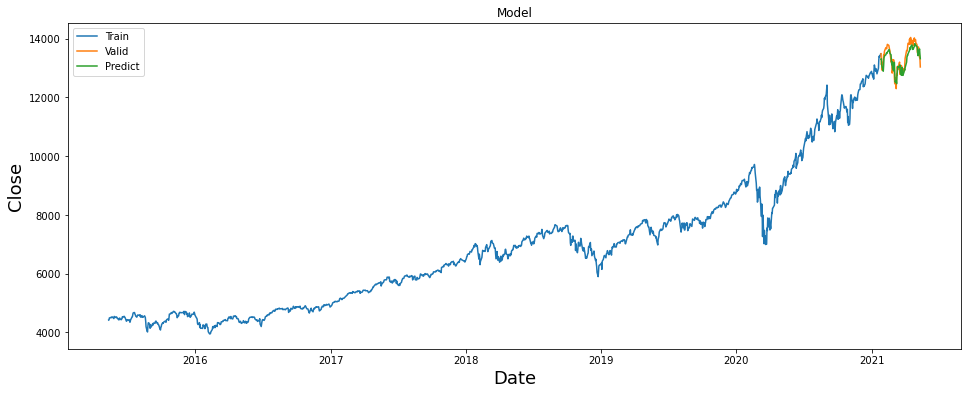

In [56]:
# Plot the data

valid = df_final[tt:]
valid['Predict'] = predict

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.plot(df_final.Close[:tt])
plt.plot(valid[['Close', 'Predict']])
plt.legend(['Train', 'Valid', 'Predict']) 
plt.show();

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


75


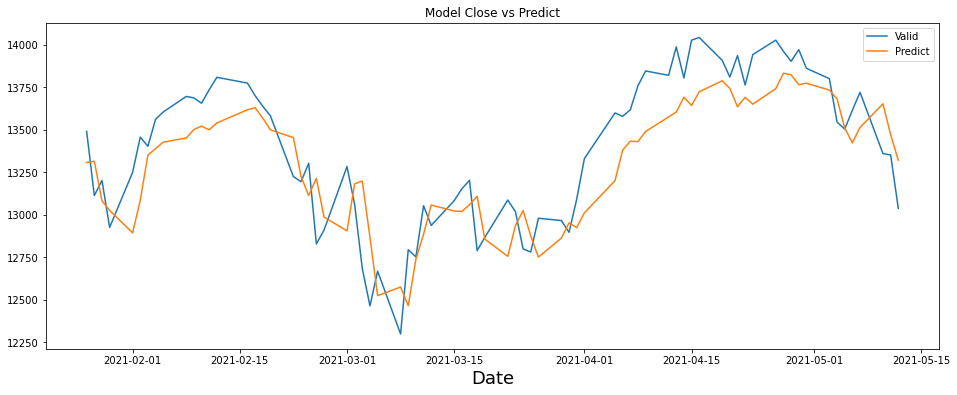

In [57]:
# Plot the data

valid = df_final[tt:]
print(len(valid))
valid['Predict'] = predict
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model Close vs Predict')
plt.xlabel('Date', fontsize=18)
plt.plot(valid[['Close', 'Predict']])
plt.legend(['Valid', 'Predict'])
plt.show();

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


                   Close       Predict       rat
Date                                            
2021-05-06  13613.730469  13422.133789 -0.014074
2021-05-07  13719.629883  13513.138672 -0.015051
2021-05-10  13359.080078  13652.130859  0.021936
2021-05-11  13351.269531  13470.657227  0.008942
2021-05-12  13037.792969  13320.650391  0.021695


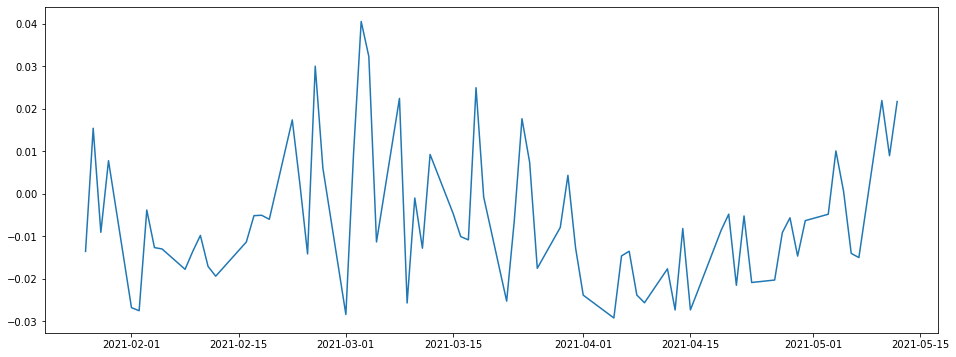

In [58]:
valid['rat'] = valid.Predict / valid.Close- 1
print(valid.tail())

plt.figure(figsize=(16,6))
plt.plot(valid['rat'])
plt.show();

In [59]:
# Calculate mae and mape
rmse = np.sqrt(np.sum(((valid.Predict - valid.Close) ** 2))/len(valid))
print('mse: ',round(rmse,2))
mape = (100 / len(valid)) * (np.sum(np.abs((valid.Close - valid.Predict) / valid.Close)))
print('mape: ',round(mape,2))

mse:  227.19
mape:  1.46


In [61]:
# forecasting for 5 days

prediction_seqs = []

# select the last group in test data
df_forecast = x_test[-1]

# apply predict and add the value to the array to predict again to 5 days.

for i in range(5): 
    predicted = []        
    predicted.append(model.predict(df_forecast[newaxis,:,:])[0,0])
    #print(predicted)

    df_forecast = df_forecast[0:]
    df_forecast = np.append(df_forecast, [predicted],axis=0)
    #print(df_forecast)
    
    value = float(scaler.inverse_transform(np.array(predicted).reshape(-1, 1)))
    print('Prediction day ',i+1,', value scaled: ', predicted[0],' & value transformed: ', value)
    prediction_seqs.append(value)

#prediction_seqs

Prediction day  1 , value scaled:  0.9285464  & value transformed:  13320.6494140625
Prediction day  2 , value scaled:  0.9238311  & value transformed:  13273.052734375
Prediction day  3 , value scaled:  0.92319626  & value transformed:  13266.64453125
Prediction day  4 , value scaled:  0.9244444  & value transformed:  13279.244140625
Prediction day  5 , value scaled:  0.92609596  & value transformed:  13295.9140625
